<a href="https://colab.research.google.com/github/SinghReena/MachineLearning/blob/master/PCA_for_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

df = pd.read_csv(url, header=None)

In [ ]:
df.columns = ["sepal length","sepal width","petal length","petal width","species"]
df

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
# Convert Iris data to numpy array
dataset = np.array(df)
X2 = dataset[:,0:4]
y2 = dataset[:,4]

In [ ]:
dataset = np.array(df)
X2 = dataset[:,0:4]
X2

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3.0, 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5.0, 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5.0, 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3.0, 1.4, 0.1],
       [4.3, 3.0, 1.1, 0.1],
       [5.8, 4.0, 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1.0, 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5.0, 3.0, 1.6, 0.2],
       [5.0, 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

## Manual computation of Principal components.

In [ ]:
# Change string values to float numbers
X = X2.astype(np.float)


There are 4 features, so the Covaraince matrix is 4x4

In [ ]:
covariant_matrix = np.cov(X.T)
print(covariant_matrix)

[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


A 4x4 matrix will have 4 eigenvectors.  The eigen vectors and their eigen values are computed.

In [ ]:
eigen_values,eigen_vectors = np.linalg.eig(covariant_matrix)

In [ ]:
print(eigen_vectors)

[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


In [ ]:
print(eigen_values)

[4.22484077 0.24224357 0.07852391 0.02368303]


4
[0.9246162071742685, 0.05301556785053501, 0.01718513952500682, 0.005183085450189842]


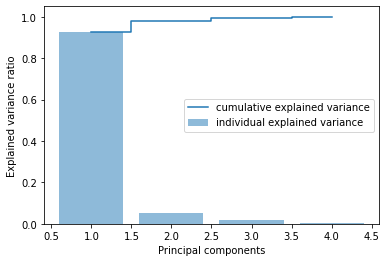

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
tot = sum(eigen_values)
var_exp = [(i/tot) for i in sorted(eigen_values,reverse=True)]
print(len(var_exp))
print(var_exp)
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(1,5),var_exp,alpha=0.5,align='center',
         label='individual explained variance')
plt.step(range(1,5),cum_var_exp,where='mid',
    label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show()

We see that the first principal component explains about 92.4% of the variance.  The first two principal components explain 98% of the variance.

## PCA using the scikit libraries

Instead of doing the PCA analysis by hand, we can do it using the library methods.

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, \
                           columns = ['principal component 1', 'principal component 2'])

In [ ]:
print(pca.explained_variance_ratio_)

[0.92461621 0.05301557]


In [ ]:
print(pca.components_)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]


In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
print(principalDf.head())


   principal component 1  principal component 2
0              -2.684207               0.326607
1              -2.715391              -0.169557
2              -2.889820              -0.137346
3              -2.746437              -0.311124
4              -2.728593               0.333925


In [ ]:
finalDf = pd.concat([principalDf, df[['species']]], axis = 1)

In [ ]:
print(finalDf.head())
print(finalDf.tail())

   principal component 1  principal component 2      species
0              -2.684207               0.326607  Iris-setosa
1              -2.715391              -0.169557  Iris-setosa
2              -2.889820              -0.137346  Iris-setosa
3              -2.746437              -0.311124  Iris-setosa
4              -2.728593               0.333925  Iris-setosa
     principal component 1  principal component 2         species
145               1.944017               0.187415  Iris-virginica
146               1.525664              -0.375021  Iris-virginica
147               1.764046               0.078519  Iris-virginica
148               1.901629               0.115877  Iris-virginica
149               1.389666              -0.282887  Iris-virginica


In [ ]:
df.species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

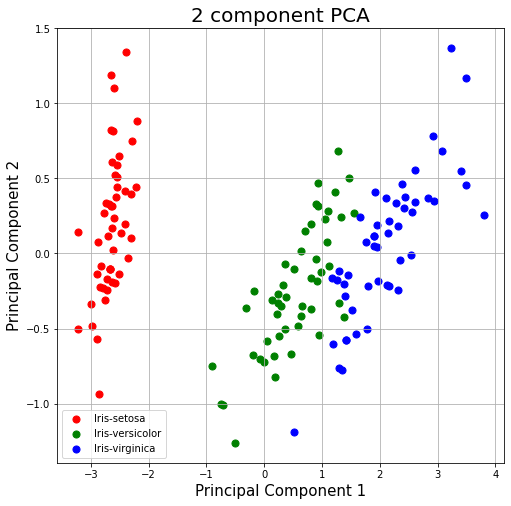

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['species'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
# PCA with 2 Principal Components = 97.5% of data variance

In [ ]:
X_pca2 = finalDf.loc[:,'principal component 1':'principal component 2']
y_pca2 = finalDf['Species']

In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
model = DecisionTreeClassifier()
model.fit(X_pca2,y_pca2)
print(model)
# make predictions
expected = y_pca2
predicted = model.predict(X_pca2)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       1.00      1.00      1.00        50
          2       1.00      1.00      1.00        50

avg / total       1.00      1.00      1.00       150

[[50  0  0]
 [ 0 50  0]
 [ 0  0 50]]


In [ ]:
# save the model to disk
import pickle
filename = 'iris_pca.pkl'
pickle.dump(pca, open(filename, 'wb'))